<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import math
import seaborn as sns

In [75]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

### 1.Загрузить датасет по url:


In [88]:
import ssl

# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

### 2. Посмотреть первые несколько рядов таблицы

In [46]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


### 3.Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

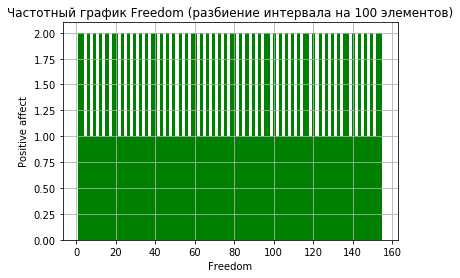

In [96]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df_new['Freedom'], 100, facecolor='g')

plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Частотный график Freedom (разбиение интервала на 100 элементов)')
plt.grid(True)
plt.show()

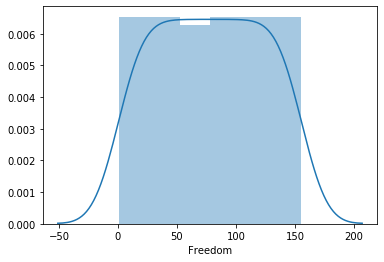

In [85]:
#гистограммы распределения Freedom
sns_plot1 = sns.distplot(df_new['Freedom'])
fig1 = sns_plot1.get_figure()

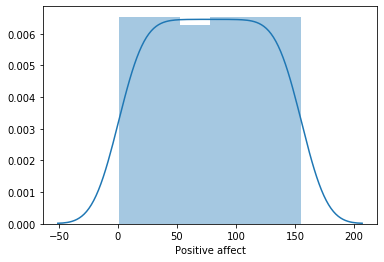

In [86]:
#гистограммы распределения Positive affect
sns_plot2 = sns.distplot(df_new['Positive affect'])
fig2 = sns_plot2.get_figure()

распределения Freedom и positive affect визуально похожи на равномерное распределение, выборки равномерны

### 4. Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [48]:
#всего в датафрейме 156 строк, найдем незаполненные для Freedom
df[df['Freedom'].isnull()]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [49]:
#сформируем новый датафрейм без учета незаполненой строки, будем считать ее выбросом
df_new = df[~df['Freedom'].isnull()]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           155 non-null object
Ladder                     155 non-null int64
SD of Ladder               155 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      151 non-null float64
Healthy life
expectancy    149 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 14.5+ KB


**MEAN мат.ожидание (среднее значение)**

In [50]:
#1способ: мат.ожидание (среднее значение)
statistics.mean(df_new['Freedom'])

78.0

In [51]:
#2 способ:
math.fsum(df_new['Freedom'])/len(df_new['Freedom'])

78.0

**MEDIAN медиана**

In [52]:
statistics.median(df_new['Freedom'])

78.0

**min**

In [53]:
min(df_new['Freedom'])

1.0

**max**

In [54]:
max(df_new['Freedom'])

155.0

**RANGE рахмах**

In [57]:
max(df_new['Freedom']) - min(df_new['Freedom'])

154.0

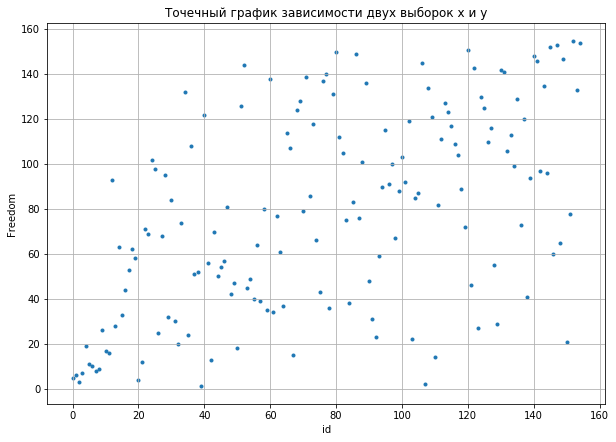

In [78]:
#Можно посмотреть разброс Freedom
y = df_new['Freedom']

plt.xlabel('id')
plt.ylabel('Freedom')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
# вектор от 0 до 155
x = [i for i in range(0, len(df_new['Freedom']))]
plt.scatter(x, y, marker='.')
plt.show()

**STANDART DEVIATION стандартное отклонение**

In [55]:
statistics.pstdev(df_new['Freedom'])

44.74371464239419

**VARIANCE дисперсия**

In [56]:
statistics.pvariance(df_new['Freedom'])

2002.0

значение дисперсии достаточно большое, можно сделать вывод, что значения достаточно далеки друг от друга

**MODE мода**

In [58]:
statistics.mode(df_new['Freedom'])

StatisticsError: no unique mode; found 155 equally common values

In [60]:
len(df_new['Freedom'].unique())

155

Почему нельзя найти моду?

мода отсутствует, так как все значения уникальны (не повторяются)

In [67]:
#основная статистика
df_new.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,151.000000,149.000000
mean,78.819355,78.451613,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,77.000000,75.718121
std,45.146870,45.319815,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,43.734045,43.509409
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,40.500000,39.500000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,39.500000,38.000000
50%,79.000000,78.000000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,77.000000,76.000000
75%,117.500000,117.500000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.500000,113.000000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


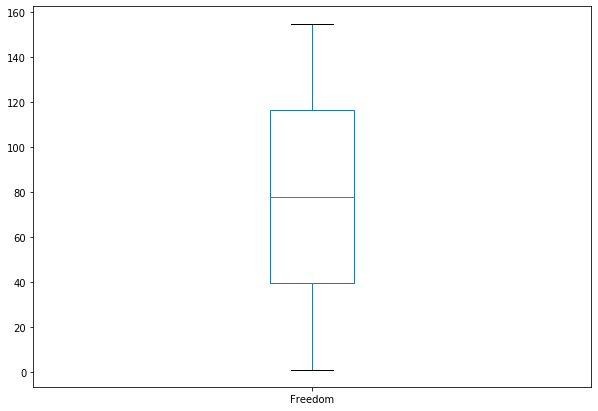

In [71]:
#Построим boxplot распределения
df_new['Freedom'].plot(kind='box')

Box plot состоит из коробки (поэтому он и называется box plot), усиков и точек.
* Коробка показывает интерквантильный размах распределения, то есть соответственно 25% (Q1) и 75% (Q3) процентили. 
* Черта внутри коробки обозначает медиану распределения. 
* Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток (Q1 - 1.5*IQR, Q3 + 1.5*IQR), где IQR = Q3 - Q1 - интерквантильный размах. 
* Точками на графике обозначаются выбросы (outliers) - те значения, которые не вписываются в промежуток значений, заданный усами графика

### 5. Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

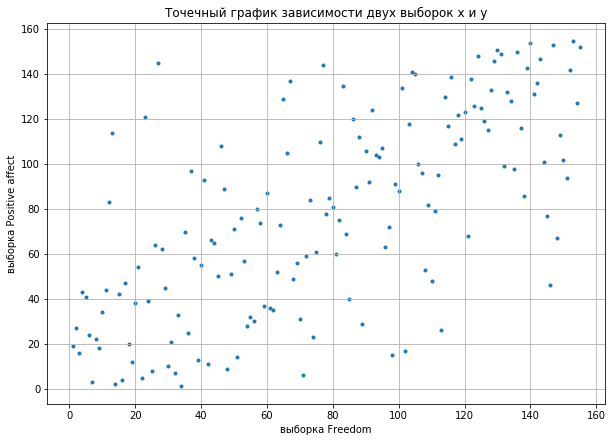

In [79]:
freedom = df_new['Freedom']
positive_affect = df_new['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')

Коэффициент корреляции Пирсона: 0.6817698430601657


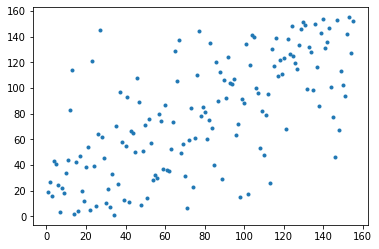

In [104]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(freedom, positive_affect)
plt.scatter(freedom, positive_affect, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона близок к 1, прямая корреляция, между Freedom и Positive affect наблюдается линейная связь

### 6. Нормализовать данные колонки Freedom (централизация + масштабирование)

Операция центрирования

In [97]:
freedom = df_new['Freedom']
print(statistics.mean(freedom))

78.0


In [98]:
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

0.0


Масштабирование выборки

In [99]:
min(freedom_1)

-77.0

In [100]:
max(freedom_1)

77.0

In [101]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


(array([16., 15., 16., 15., 15., 16., 15., 16., 15., 16.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

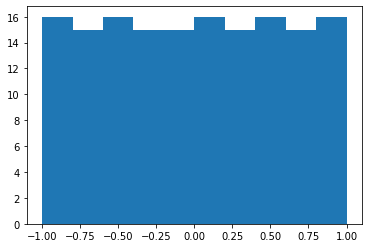

In [102]:
plt.hist(freedom_2)

### 7. Построить матрицу корреляций для всех колонок таблицы

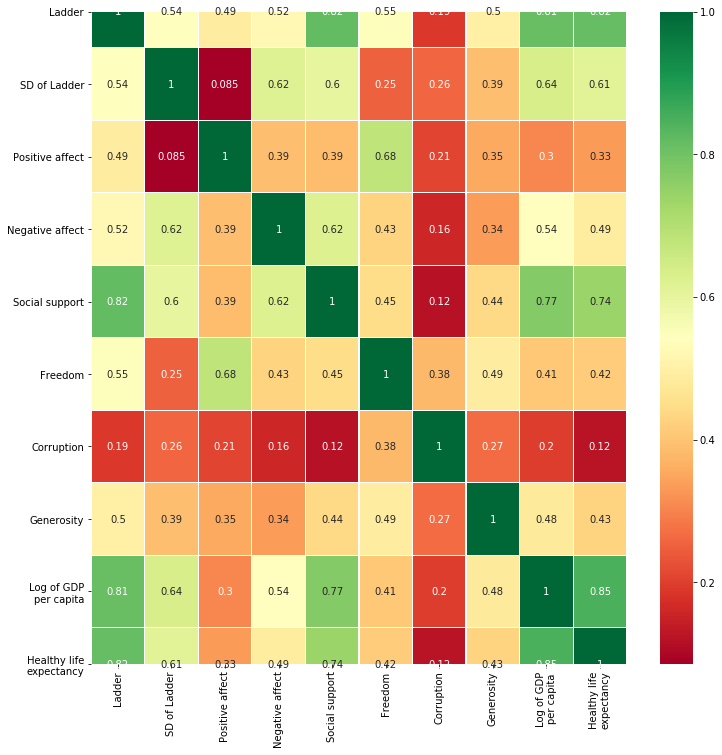

In [111]:
import seaborn as sns
sns.heatmap(df_new.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()


### 8. Загрузить таблицу цен на авокадо: 

In [89]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df_av=pd.read_csv(url)
df_av[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [91]:
df_av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


### Сделать частотный график колонки AveragePrice. Какое это распределение?

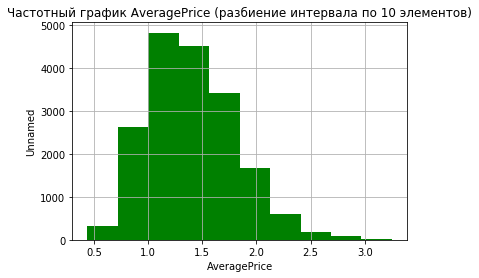

In [92]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df_av['AveragePrice'], 10, facecolor='g')

plt.xlabel('AveragePrice')
plt.ylabel('Unnamed')
plt.title('Частотный график AveragePrice (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

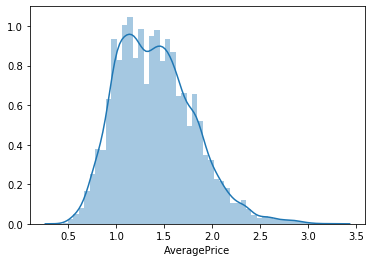

In [94]:
#гистограммы распределения AveragePrice
sns_plot3 = sns.distplot(df_av['AveragePrice'])
fig3 = sns_plot3.get_figure()

визуально распределение похоже на нормальное, но есть смещение

### Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

*   AveragePrice - средняя цена на один авокадо (авокадо продаются обычно в брикетах по несколько штук)
*   4046 - общее количество авокадо с кодом 4046
*   4225 - общее количество авокадо с кодом 4225
*   4770 - общее количество авокадо с кодом 4770

In [0]:
from scipy.stats import pearsonr

In [106]:
col_Average_Price = df_av['AveragePrice']
col_4046 = df_av['4046']

Коэффициент корреляции Пирсона для Average Price и 4046: -0.2083170484878843


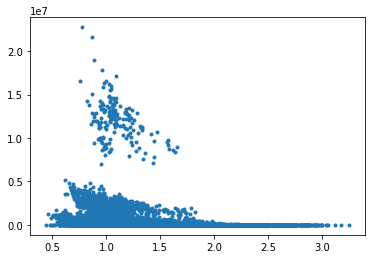

In [108]:
corr, p_value = pearsonr(col_Average_Price, col_4046)
plt.scatter(col_Average_Price, col_4046, marker='.')
print('Коэффициент корреляции Пирсона для Average Price и 4046:', corr)

Коэффициент корреляции Пирсона для Average Price и 4225: -0.17292777250933525


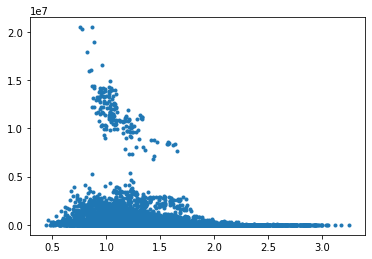

In [109]:
col_4225 = df_av['4225']

corr, p_value = pearsonr(col_Average_Price, col_4225)
plt.scatter(col_Average_Price, col_4225, marker='.')
print('Коэффициент корреляции Пирсона для Average Price и 4225:', corr)

Коэффициент корреляции Пирсона для Average Price и 4770: -0.1794459839797562


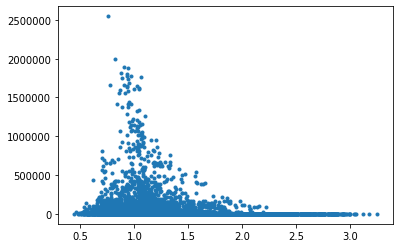

In [110]:
col_4770 = df_av['4770']

corr, p_value = pearsonr(col_Average_Price, col_4770)
plt.scatter(col_Average_Price, col_4770, marker='.')
print('Коэффициент корреляции Пирсона для Average Price и 4770:', corr)

во всех примерах корреляция близка к -1, обратная корреляция